# Zero Shot CLassification with Pretrained CLIP

<img src=https://learnopencv.com/wp-content/uploads/2024/08/CLIP-Zero-Short-Inference-Pipeline-1024x623.png height=400>

## Reference :
- ***Blogs***: 
    - [Training CLIP Model from Scratch for an Fashion Image Retrieval App](https://learnopencv.com/clip-model/)
- ***Github***:
    - https://github.com/spmallick/learnopencv/tree/master/Training-CLIP-from-Scratch-for-Image-Retrieval

----

### Conda env : [cv_playgrounds](../../README.md#setup-a-conda-environment)

In [2]:
from PIL import Image
import requests

import torch
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt

In [3]:
pretrained_clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [4]:
total_params = sum(param.numel() for param in pretrained_clip.parameters())

print(f"Total number of parameters in the model: {total_params}")

Total number of parameters in the model: 151277313


### Plotting Utility

In [ ]:
def visualize_predictions(image,pred_cls):
    plt.figure(figsize=(6,6))
    plt.title(f"Predicted Class: {pred_cls}", fontsize=16)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def prediction(url, labels):

    image = Image.open(requests.get(url,stream=True).raw)
    inputs = processor(labels, images=image, return_tensors ="pt", padding = True)
    outputs = pretrained_clip(**inputs)
    logits_per_image = outputs.logits_per_image

    probs = logits_per_image.softmax(dim=1)
    cls_ids = torch.argmax(probs, dim=1)
    pred_cls = labels[cls_ids.item()]
    # print(probs.cpu().detach().numpy())
    prob_dict = {l: p.item() for l, p in zip(labels, probs[0])}
    print(prob_dict)

    visualize_predictions(image, pred_cls)
    return

## Facial Emotion Recognition

{'Smile': 0.9934226870536804, 'Sad': 0.0014778687618672848, 'Cry': 0.0014795553870499134, 'Surprise': 0.002975797513499856, 'Anger': 0.0006440967554226518}


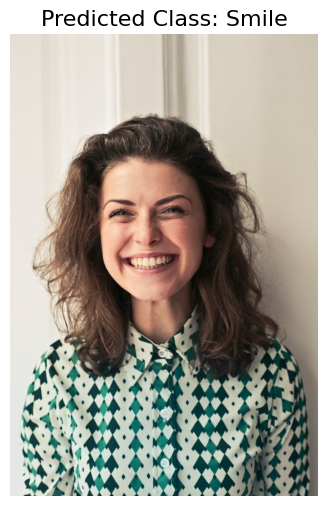

In [45]:
url = "https://images.pexels.com/photos/774909/pexels-photo-774909.jpeg?auto=compress&cs=tinysrgb&w=600"
labels = ["Smile","Sad", "Cry", "Surprise", "Anger"]
prediction(url, labels)

{'Smile': 0.41643816232681274, 'Sad': 0.00313140288926661, 'Cry': 0.004716131370514631, 'Surprise': 0.5636332035064697, 'Anger': 0.012081047520041466}


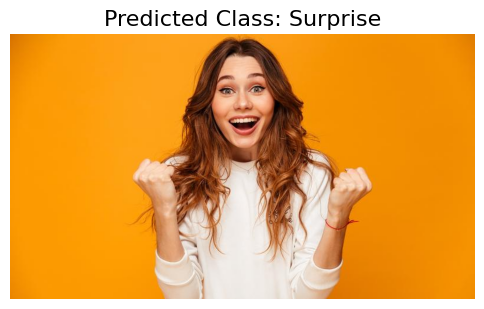

In [46]:
url = "https://d26oc3sg82pgk3.cloudfront.net/files/media/edit/image/47054/article_full%401x.jpg"
prediction(url, labels)

## Natural Images

In [47]:
!wget https://cdn.unenvironment.org/2021-07/Tiger_shutterstock.jpeg -O tiger.jpg

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


--2025-09-17 16:40:08--  https://cdn.unenvironment.org/2021-07/Tiger_shutterstock.jpeg
Resolving cdn.unenvironment.org (cdn.unenvironment.org)... 104.21.64.78, 172.67.178.121, 2606:4700:3032::6815:404e, ...
Connecting to cdn.unenvironment.org (cdn.unenvironment.org)|104.21.64.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 812555 (794K) [image/jpeg]
Saving to: ‘tiger.jpg’

tiger.jpg           100%[===================>] 793.51K  3.60MB/s    in 0.2s    

2025-09-17 16:40:08 (3.60 MB/s) - ‘tiger.jpg’ saved [812555/812555]



{'Lion': 0.0050801848992705345, 'Panther': 0.010573201812803745, 'Cheetah': 0.0003343684074934572, 'Tiger': 0.9511377811431885, 'Leopard': 0.017259890213608742, 'Jaguar': 0.015614679083228111}


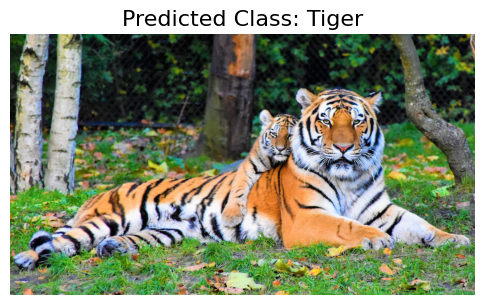

In [ ]:
img_path = "tiger.jpg"

def visualize_predictions(image,pred_cls):
    plt.figure(figsize=(6,6))
    plt.title(f"Predicted Class: {pred_cls}", fontsize=16)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def prediction_img(img_path, labels):

    image = Image.open(img_path)
    inputs = processor(labels, images=image, return_tensors ="pt", padding = True)
    outputs = pretrained_clip(**inputs)
    logits_per_image = outputs.logits_per_image

    probs = logits_per_image.softmax(dim=1)
    cls_ids = torch.argmax(probs, dim=1)
    pred_cls = labels[cls_ids.item()]
    prob_dict = {l: p.item() for l, p in zip(labels, probs[0])}
    print(prob_dict)

    visualize_predictions(image, pred_cls)
    return
labels = ["Lion", "Panther", "Cheetah", "Tiger", "Leopard", "Jaguar"]
prediction_img(img_path, labels)

{'Bald Eagle': 0.9582395553588867, 'Golden Eagle': 0.030889399349689484, 'Vulture': 0.004361014347523451, 'Hawk': 0.006510037463158369}


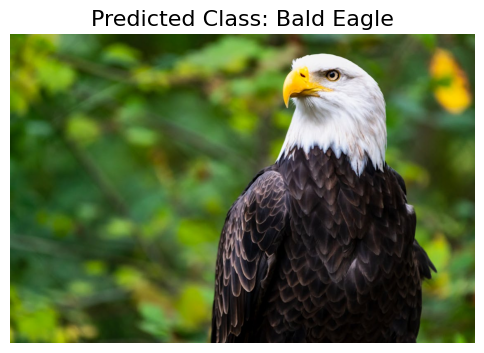

In [60]:
url = "https://images.pexels.com/photos/9877289/pexels-photo-9877289.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1"
labels = ["Bald Eagle", "Golden Eagle", "Vulture", "Hawk"]
prediction(url, labels)

{'Kitten': 0.35278064012527466, 'Cat': 0.268441766500473, 'Baby Cat': 0.2551726996898651, 'White Cat': 0.12009695172309875, 'Fur': 0.0035079887602478266}


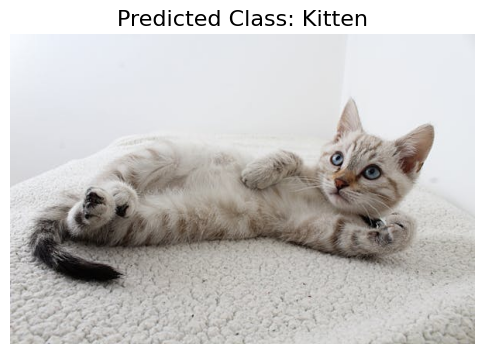

In [61]:
url = "https://images.pexels.com/photos/2558605/pexels-photo-2558605.jpeg?auto=compress&cs=tinysrgb&w=600"
labels = ["Kitten","Cat", "Baby Cat", "White Cat", "Fur"]
prediction(url, labels)

## Human Activities

{'Meditation': 0.8847410678863525, 'Yoga': 0.11197851598262787, 'Eyes closed': 0.0011025432031601667, 'Karate': 0.0008630751399323344, 'Indian Martial Arts': 0.0005306856473907828, 'Martial Arts': 0.0007840227917768061}


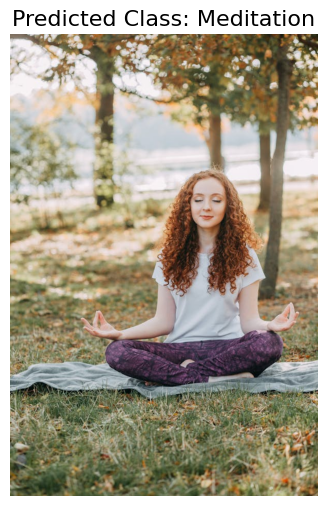

In [62]:
url = "https://images.pexels.com/photos/3759657/pexels-photo-3759657.jpeg?auto=compress&cs=tinysrgb&w=600"
labels = ["Meditation", "Yoga", "Eyes closed", "Karate", "Indian Martial Arts","Martial Arts"]
prediction(url, labels)

{'Meditation': 0.08208950608968735, 'Yoga': 0.8063886761665344, 'Eyes closed': 0.002247066469863057, 'Karate': 0.008823996409773827, 'Indian Martial Arts': 0.06577972322702408, 'Martial Arts': 0.03467101603746414}


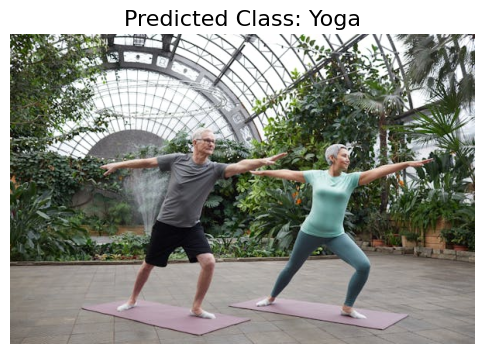

In [63]:
url = "https://images.pexels.com/photos/6787440/pexels-photo-6787440.jpeg?auto=compress&cs=tinysrgb&w=600"
prediction(url, labels)

{'Meditation': 2.4143258997355588e-05, 'Yoga': 9.121842595050111e-06, 'Eyes closed': 6.885860057082027e-05, 'Karate': 0.004930032417178154, 'Indian Martial Arts': 0.9291990399360657, 'Martial Arts': 0.06576888263225555}


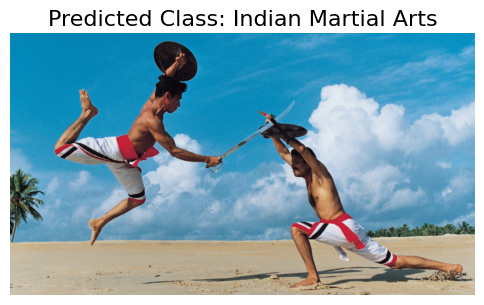

In [64]:
url = "https://www.keralatourism.org/images/artforms/large/kalaripayattu20131111114353_27_1.jpg"
prediction(url, labels)

## Inference on Digit Recognition

In [65]:
labels = ["One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]

{'One': 0.08869676291942596, 'Two': 0.03967975452542305, 'Three': 0.032890211790800095, 'Four': 0.016939571127295494, 'Five': 0.12548154592514038, 'Six': 0.21863403916358948, 'Seven': 0.02717525325715542, 'Eight': 0.3451840281486511, 'Nine': 0.10531876236200333}


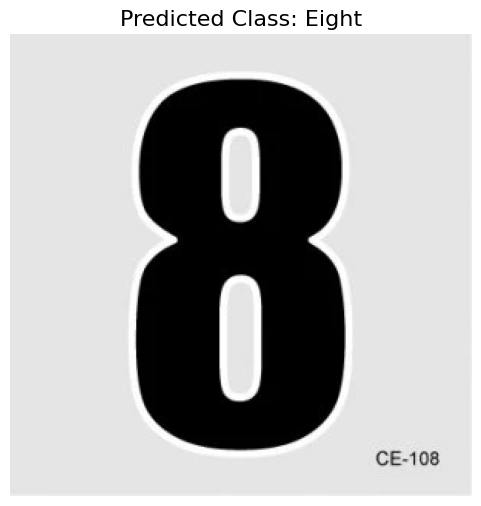

In [66]:
url = "https://www.tattstore.com/upload/product_images/2737_1.webp"
prediction(url, labels)

### Failure Cases

{'One': 0.019759049639105797, 'Two': 0.05539935454726219, 'Three': 0.15555012226104736, 'Four': 0.10034549981355667, 'Five': 0.17838162183761597, 'Six': 0.3521862328052521, 'Seven': 0.02738102525472641, 'Eight': 0.08064279705286026, 'Nine': 0.030354253947734833}


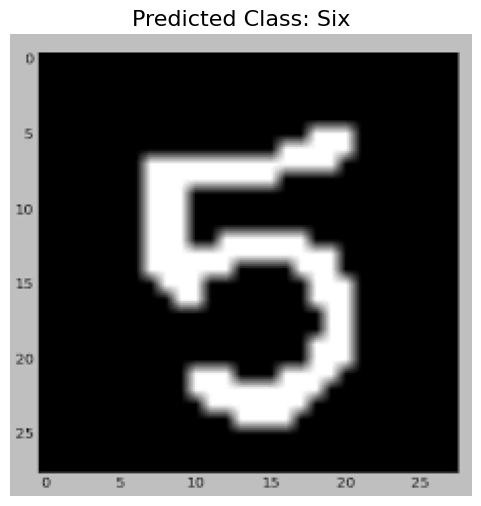

In [67]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5wi37gUJD1qpzhA_tNi1BWYvFI0dJvd5WiQhmA0PHr70PJQNKuWt0FdzS8G_XEzZa5J8&usqp=CAU"
prediction(url, labels)

{'One': 0.23468492925167084, 'Two': 0.18367059528827667, 'Three': 0.12138611078262329, 'Four': 0.03461431339383125, 'Five': 0.031697485595941544, 'Six': 0.13243155181407928, 'Seven': 0.02959093078970909, 'Eight': 0.14048120379447937, 'Nine': 0.09144285321235657}


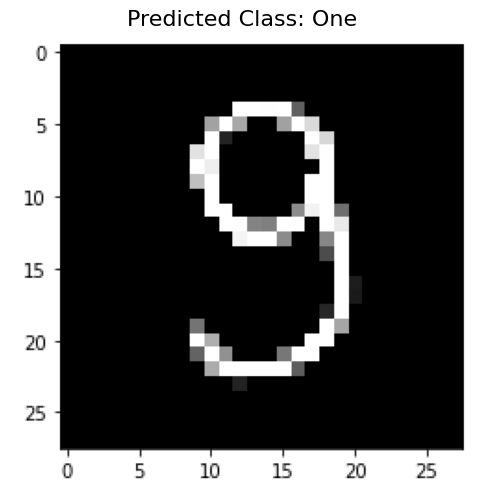

In [68]:
url = "https://i.sstatic.net/vuBw4.png"
prediction(url, labels)